In [78]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [171]:
hdu_in = fits.open('/home/sam/Documents/ESA/data/sim/tng_test/fits/TNG300_1_z_99_subhalos_22736_m_proj_r_2048_w_1000_n_0_-1_0.fits')

In [136]:
hdu_in = fits.open('/home/sam/Documents/ESA/data/sim/tng_test/fits/TNG300_1_z_99_subhalos_0_m_proj_r_2048_w_1000_n_0_0_1.fits')

In [137]:
fov = 0.8 # Degrees

res = hdu_in['XRAY_PHOTON_INTENSITY_0.5_2.0_KEV'].header['NAXIS1']

zoom = 1.0
offset_x = 0 # range -1, 1. Percentage of possible offset, this scales with the zoom level
offset_y = 0

max_offset = (res/2.0)*(1.0 - 1.0/zoom) #The maximal pixel offset
crpix1 = (res/2.0) + offset_x*max_offset # Defines the center pixel x
crpix2 = (res/2.0) + offset_y*max_offset # Defines the center pixel y

# cdelt give the pixel sizes in degrees
cdelt = (fov/res)*zoom
cdelt1 = cdelt
cdelt2 = cdelt

# header = hdu_in['XRAY_PHOTON_INTENSITY_0.5_2.0_KEV'].header

header = fits.Header()


header['CUNIT1'] = 'deg'
header['CUNIT2'] = 'deg'
header['CDELT1'] = -1.0*cdelt1
header['CDELT2'] = cdelt2
header['CRPIX1'] = crpix1
header['CRPIX2'] = crpix2
header['CRVAL1']  = 0.0                                                  
header['CRVAL2']  = 0.0 

header['CTYPE1'] = 'RA---TAN'
header['CTYPE2'] = 'DEC--TAN'
header['MTYPE1']  = 'EQPOS'                                                            
header['MFORM1']  = 'RA,DEC' 


data = hdu_in['XRAY_PHOTON_INTENSITY_0.5_2.0_KEV'].data
# data = np.round(data/1.0e-8).astype(np.int32)
data = data/1.0e-8

hdu = fits.PrimaryHDU(data, header=header)


hdu.writeto("test.fits", overwrite=True)




In [138]:
hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
CUNIT1  = 'deg     '                                                            
CUNIT2  = 'deg     '                                                            
CDELT1  =         -0.000390625                                                  
CDELT2  =          0.000390625                                                  
CRPIX1  =               1024.0                                                  
CRPIX2  =               1024.0                                                  
CRVAL1  =                  0.0                                                  
CRVAL2  =                  0

In [172]:
data = hdu_in['XRAY_PHOTON_INTENSITY_0.5_2.0_KEV'].data

In [173]:
data.shape

(2048, 2048)

In [184]:
box_size_perc = 0.05
res = data.shape[0]
out_pixels = box_size_perc/2 * res

center_x = data.shape[0]/2
center_y = data.shape[1]/2
x_left = int(center_x - out_pixels)
x_right = int(center_x + out_pixels)
y_left = int(center_y - out_pixels)
y_right = int(center_y + out_pixels)

center_cutout = data[x_left:x_right,y_left:y_right]

target_mean = 1000
current_mean = np.mean(center_cutout)

scaling_factor = target_mean/current_mean
scaled_data = data*scaling_factor

In [175]:
np.mean(center_cutout)

1.2815495796458196e-07

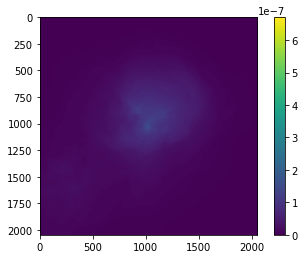

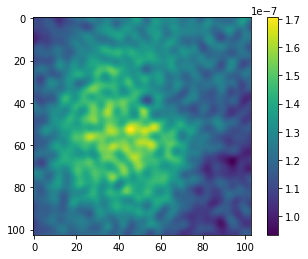

In [187]:
plt.imshow(data)
plt.colorbar()
plt.show()

plt.imshow(center_cutout)
plt.colorbar()
plt.show()

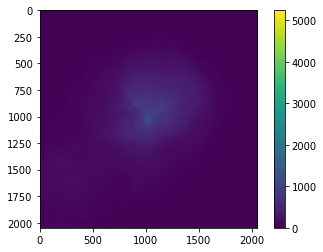

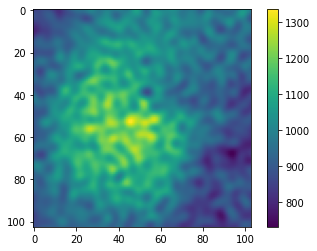

In [189]:
plt.imshow(scaled_data)
plt.colorbar()
plt.show()

plt.imshow(center_cutout*scaling_factor)
plt.colorbar()
plt.show()

In [179]:
np.min(data)

4.01184202926515e-10

In [180]:
np.max(data)

6.703960213348058e-07

In [181]:
# Make the smallest value 0
data = data - np.min(data)

In [182]:
sort_d = np.sort(data.flatten())
scale_val = sort_d[int(len(sort_d)*0.99)]
print(scale_val)

1.0481730624453828e-07


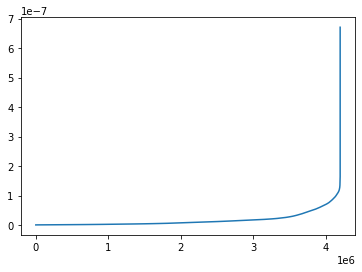

In [183]:
plt.plot(f_d)

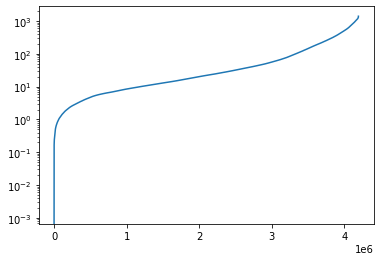

In [145]:
scaled_data = sort_d/scale_val*1000

plt.plot(scaled_data)
plt.yscale('log')

In [126]:
np.min(scaled_data)

0.0

In [127]:
f_d[int(len(f_d)*0.99)]

1.052184904474648e-07

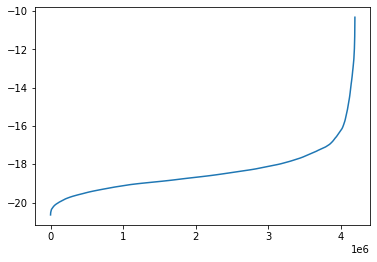

In [94]:
plt.plot(np.log(f_d))

In [64]:
altered_data = np.round(data/1.0e-8).astype(np.int32)

In [65]:
np.max(altered_data)

3275

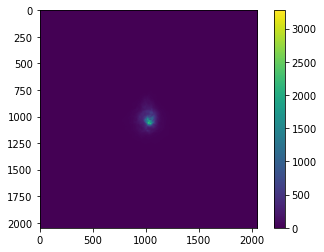

In [66]:

plt.imshow(altered_data)
plt.colorbar()

In [16]:
hdu['XRAY_PHOTON_INTENSITY_0.5_2.0_KEV'].header['CUNIT1'] = 'deg'
hdu['XRAY_PHOTON_INTENSITY_0.5_2.0_KEV'].header['CUNIT2'] = 'deg'

In [17]:
hdu['XRAY_PHOTON_INTENSITY_0.5_2.0_KEV'].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
EXTEND  =                    T                                                  
EXTNAME = 'XRAY_PHOTON_INTENSITY_0.5_2.0_KEV' / extension name                  
BTYPE   = 'xray_photon_intensity_0.5_2.0_keV'                                   
BUNIT   = 'photons/(arcsec**2*cm**2*s)'                                         
LUNIT   =                  1.0 / [kpc]                                          
TUNIT   = 4.55517862415116E+16 / [s]                                            
MUNIT   = 2.93622674933569E+43 / [g]                                            
VUNIT   =    99999.999999999

In [30]:
hdu = fits.open('/home/sam/Documents/ESA/data/sim/tng300_2048/fits/TNG300_1_z_99_subhalos_0_r_2048__n_0_0_-1_z_1_0.fits')

In [31]:
hdu.info()

Filename: /home/sam/Documents/ESA/data/sim/tng300_2048/fits/TNG300_1_z_99_subhalos_0_r_2048__n_0_0_-1_z_1_0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   (2048, 2048)   float64   


In [32]:
hdu['PRIMARY'].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
EXTEND  =                    T                                                  
MTYPE1  = 'EQPOS   '                                                            
MFORM1  = 'RA,DEC  '                                                            
CTYPE1  = 'RA---TAN'                                                            
CTYPE2  = 'DEC--TAN'                                                            
CRPIX1  =               1024.5                                                  
CRPIX2  =               1024.5                                                  
CRVAL1  =                  0

In [17]:
bin_factor = hdu['SPECTRUM'].header['SPECDELT']
channels = hdu['SPECTRUM'].data['CHANNEL']

# Calculate the rate based on the counts
counts = hdu['SPECTRUM'].data['COUNTS'].astype(np.float32)
rates = counts / float(hdu['SPECTRUM'].header['EXPOSURE'])

In [18]:
hdu['SPECTRUM'].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                    6 / width of table in bytes                        
NAXIS2  =                 4096 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    2 / number of fields in each row                   
TTYPE1  = 'CHANNEL '           / The name of this column                        
TFORM1  = 'I       '           / data format of field: 2-byte INTEGER           
TTYPE2  = 'COUNTS  '           / The name of this column                        
TFORM2  = 'J       '           / data format of field: 4-byte INTEGER           
TUNIT2  = 'count   '        

In [19]:
bin_factor_qpb = hdu['SPECTRUM'].header['SPECDELT']
channels_qpb = hdu_qpb['SPECTRUM'].data['CHANNEL']
# Calculate the rate based on the counts
counts_qpb = hdu_qpb['SPECTRUM'].data['COUNTS'].astype(np.float32)
rates_qpb = counts_qpb / float(hdu_qpb['SPECTRUM'].header['EXPOSURE'])

In [20]:
hdu_qpb['SPECTRUM'].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                    6 / width of table in bytes                        
NAXIS2  =                 4096 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    2 / number of fields in each row                   
TTYPE1  = 'CHANNEL '           / The name of this column                        
TFORM1  = 'I       '           / data format of field: 2-byte INTEGER           
TTYPE2  = 'COUNTS  '           / The name of this column                        
TFORM2  = 'J       '           / data format of field: 4-byte INTEGER           
TUNIT2  = 'count   '        

[]

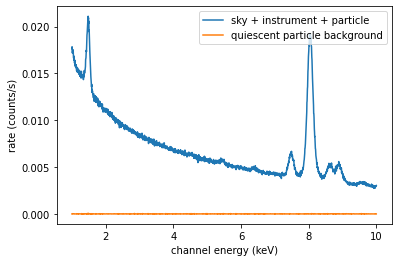

In [21]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(5,3))
emin = 0.5 #keV
emax = 2  #keV
emin = 1 #keV
emax = 10  #keV
bin_factor = hdu['SPECTRUM'].header['SPECDELT']
channel_index_range = range(int(emin*1000/float(bin_factor)), int(emax*1000/float(bin_factor)))
x = channels[channel_index_range]*bin_factor/1000
plt.plot(x, rates[channel_index_range], label="sky + instrument + particle")
plt.plot(x, rates_qpb[channel_index_range], label="quiescent particle background")
# plt.yscale("log")
# plt.xscale("log")

plt.ylabel("rate (counts/s)")
plt.xlabel("channel energy (keV)")
plt.legend()
# plt.savefig("background_noise.pdf")
plt.plot()

In [170]:
hdu['SPECTRUM'].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                    6 / width of table in bytes                        
NAXIS2  =                 4096 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    2 / number of fields in each row                   
TTYPE1  = 'CHANNEL '           / The name of this column                        
TFORM1  = 'I       '           / data format of field: 2-byte INTEGER           
TTYPE2  = 'COUNTS  '           / The name of this column                        
TFORM2  = 'J       '           / data format of field: 4-byte INTEGER           
TUNIT2  = 'count   '        

In [171]:
channels

array([    0,     5,    10, ..., 20465, 20470, 20475], dtype=int16)

In [172]:
channels_qpb

array([    0,     5,    10, ..., 20465, 20470, 20475], dtype=int16)

In [15]:
channel_col = fits.Column('CHANNEL', format='J', unit = ' ', array=channels) #dim=f'{channels.shape}', 
rate_col = fits.Column('RATE', format='D', unit = 'cts/s/bin/m/m', array=rates) #dim=f'{rates.shape}', 

coldefs = fits.ColDefs([channel_col, rate_col])
spectrum_hdr = fits.Header()
# Include the headers

spectrum_hdr['TUNIT1'] = ''
spectrum_hdr['TUNIT2'] = 'cts/s/bin/m/m'
spectrum_hdr['SPECDELT'] = bin_factor

# vignet_hdr['INSTRUME'] = 'EPIC-PN'
spectrum_hdr.add_history('Produced by Sam Sweere (ESAC Trainee) according to the paper: The XMM-Newton EPIC background and the production of background blank sky event files by Carter, J. A.; Read, A. M.')
spectrum_hdr = fits.BinTableHDU.from_columns(coldefs, header=spectrum_hdr)
spectrum_hdr.name = 'SPECTRUM'

# Create the final hdul
primary_hdu = fits.PrimaryHDU()
hdul = fits.HDUList([primary_hdu, spectrum_hdr])

In [16]:
# Save the new fits file
hdul.writeto('xmm_pn_phabackground.fits', overwrite=True)